In [1]:
import torch
from PIL import Image

In [2]:
from lavis.processors import load_processor
from lavis.models import load_model

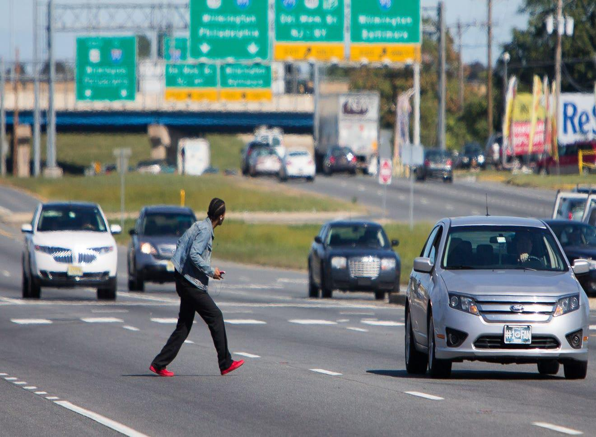

In [3]:
raw_image = Image.open("/home/xtest/lavis/LAVIS/cache/heat/images/test/7099.jpg").convert("RGB")
display(raw_image.resize((596, 437)))

In [4]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# FineTuned

In [12]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)

In [13]:
image = vis_processor(raw_image).unsqueeze(0).to(device)

In [14]:
ckp_path = "/home/xtest/lavis/LAVIS/lavis/output/BLIP/Caption_coco/20221128104/checkpoint_best.pth"

In [15]:
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)

In [16]:
model.generate({"image": image})

['a pedestrian crosses the road in front of a line of cars on interstate 101 in houston']

In [17]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['pedestrian shoe near i16 in houston',
 'pedestrians cross an expressway near the south miami smartland boulevard roundabout in the median between miami and hollywood beach on wednesday jan 8 2020',
 'man crossing busy road in long island']

# COCO

In [5]:
from lavis.models import load_model_and_preprocess


In [8]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# uncomment to use base model
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip_caption", model_type="base_coco", is_eval=True, device=device
# )
vis_processors.keys()

dict_keys(['train', 'eval'])

In [9]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)


In [10]:
model.generate({"image": image})


['a man walking across a street next to a bunch of cars']

In [11]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a man walking down the street with his phone',
 'traffic on a busy highway with several cars driving',
 'a man crossing a busy highway wearing red shoes']

## change path to finetuned model

In [6]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# uncomment to use base model
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip_caption", model_type="base_coco", is_eval=True, device=device
# )
vis_processors.keys()

dict_keys(['train', 'eval'])

In [7]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)


In [8]:
model.generate({"image": image})


['a pedestrian crosses the road in front of a line of cars on interstate 101 in houston']

In [9]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['pedestrian crossing over freeway with traffic in the background',
 'pedestrians cross the a520 exit ramp at interstate 66 near the exit to exit boulevard at roosevelt drive on sunday may 7 2018 in',
 'pedestrians cross the freeway in st petersburg on saturday may 17 2018 usns photo']